### MNIST Classifier

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D
from tensorflow.keras import Model
from time import time


from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

#### Dataset Loading

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Dataset params
num_classes = 10
size = x_train.shape[1]

# Normalization
x_train = x_train/255
x_test = x_test/255

# One-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

Train set:    60000 samples
Test set:     10000 samples
Sample dims:  (60000, 28, 28)


#### Building the Classifier

CNN classifier with softmax activation in the last layer (classification head).

In [3]:
inputs = Input(shape=(size, size, 1))

net = Conv2D(16, kernel_size=(3, 3), activation="relu")(inputs)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Conv2D(32, kernel_size=(3, 3), activation="relu")(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Flatten()(net)
outputs = Dense(num_classes, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0   

#### Training

In [4]:
epochs = 25
batch_size = 128

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

start = time()
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
print('Elapsed time', time() - start)


Epoch 1/25


422/422 [==============================] - 13s 22ms/step - loss: 0.3848 - accuracy: 0.8933 - val_loss: 0.1138 - val_accuracy: 0.9708
Epoch 2/25
422/422 [==============================] - 9s 21ms/step - loss: 0.1048 - accuracy: 0.9684 - val_loss: 0.0897 - val_accuracy: 0.9747
Epoch 3/25
422/422 [==============================] - 8s 18ms/step - loss: 0.0767 - accuracy: 0.9763 - val_loss: 0.0628 - val_accuracy: 0.9823
Epoch 4/25
422/422 [==============================] - 7s 18ms/step - loss: 0.0629 - accuracy: 0.9809 - val_loss: 0.0585 - val_accuracy: 0.9845
Epoch 5/25
422/422 [==============================] - 6s 14ms/step - loss: 0.0546 - accuracy: 0.9835 - val_loss: 0.0542 - val_accuracy: 0.9860
Epoch 6/25
422/422 [==============================] - 6s 15ms/step - loss: 0.0492 - accuracy: 0.9849 - val_loss: 0.0494 - val_accuracy: 0.9857
Epoch 7/25
422/422 [==============================] - 6s 15ms/step - loss: 0.0440 - accuracy: 0.9871 - val_loss: 0.0518 - val_accuracy: 0.

Let's now plot the history to see the evolution of the training.

Train Acc      0.9968518614768982
Validation Acc 0.9909999966621399


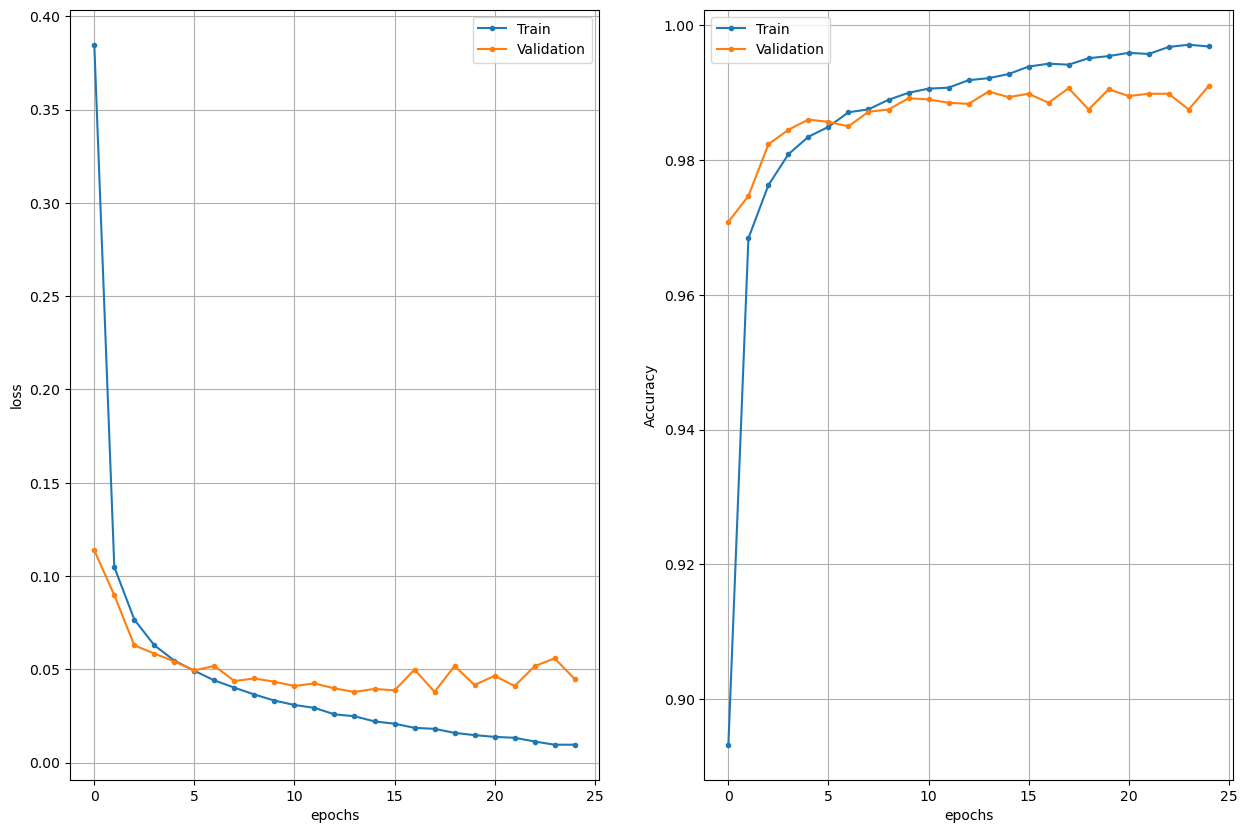

In [5]:
# import snippets as snippets
from plotly_snippets import plot_history
plot_history(history)

Accuracy

In [6]:
y_true = np.argmax(y_test, axis=1)
y_pred = model.predict(x_test)

print('True', y_true[0:5])
print('Pred', np.argmax(y_pred[0:5, :], axis=1))
print('Pred', y_pred[0:5, :])
print(y_pred.shape)

313/313 [==============================] - 2s 4ms/step
True [7 2 1 0 4]
Pred [7 2 1 0 4]
Pred [[1.4442096e-13 7.7591053e-13 3.4976253e-08 1.9175927e-07 3.6678624e-17
  3.0635328e-13 2.8331146e-25 9.9999976e-01 3.0925065e-12 1.6716418e-09]
 [4.8948075e-11 6.4809928e-11 1.0000000e+00 1.9869889e-12 4.0523727e-17
  4.7725150e-16 1.9970834e-09 2.8667759e-16 1.4226804e-08 1.7533510e-12]
 [1.1533508e-08 9.9937469e-01 7.3418526e-08 5.9491270e-09 5.8735185e-04
  1.9297943e-08 3.0412146e-08 2.2988443e-05 1.4888657e-05 3.5097474e-09]
 [9.9979717e-01 7.4004801e-14 1.5078110e-06 3.6009373e-11 8.6336216e-11
  1.2777206e-09 2.0070728e-04 3.2864330e-07 9.7406243e-08 1.2259065e-07]
 [1.8799441e-14 5.3719453e-13 3.0919013e-12 1.3948632e-12 9.9999857e-01
  3.1854930e-13 2.5340789e-13 5.0743387e-10 9.4777935e-11 1.4795038e-06]]
(10000, 10)


In [7]:
digits = range(0, 10)
y_pred = np.argmax(y_pred, axis=1)

for digit in digits:
    mask = y_true == digit
    
    tp = np.sum(y_pred[mask] == digit)
    total = np.sum(mask)
    
    print('Digit-', digit, ' acc', tp/total)
    
print('y_true', y_true[mask])
print('y_pred', y_pred[mask])

Digit- 0  acc 0.9908163265306122
Digit- 1  acc 0.9920704845814978
Digit- 2  acc 0.9854651162790697
Digit- 3  acc 0.9910891089108911
Digit- 4  acc 0.9938900203665988
Digit- 5  acc 0.9865470852017937
Digit- 6  acc 0.9770354906054279
Digit- 7  acc 0.995136186770428
Digit- 8  acc 0.9815195071868583
Digit- 9  acc 0.9781962338949455
y_true [9 9 9 ... 9 9 9]
y_pred [9 9 9 ... 9 9 9]


The trained model can also be quickly evaluated by calling the evaluate method on the test data. It will return the loss and the metric (or metrics).

In [8]:
ev = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0422 - accuracy: 0.9873


In [9]:
print('Test loss  ', ev[0])
print('Test metric', ev[1])

Test loss   0.04221777617931366
Test metric 0.9872999787330627


Visualising some of the evaluation results.

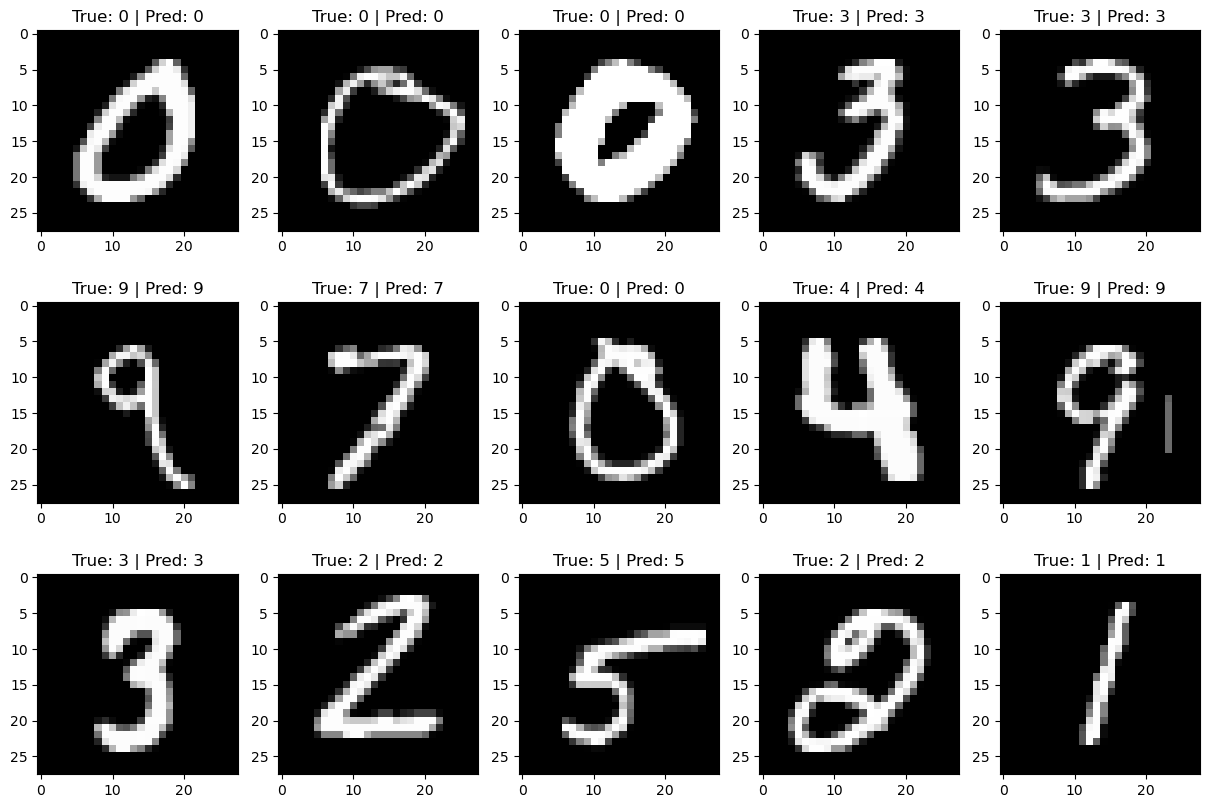

In [10]:
for ii in range(15):
    idx = np.random.randint(0, len(y_pred))
    plt.subplot(3,5,ii+1), plt.imshow(x_test[idx, ...], cmap='gray')
    plt.title('True: ' + str(y_true[idx]) + ' | Pred: ' + str(y_pred[idx]))